# Model evaluation walk through

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Dataset: Diabetes

In [2]:
df = pd.read_csv("diabetes.csv")
df["diabetes"] = df["diabetes"].replace({True:1, False:0})
df.head()

,age,num_preg,glucose_conc,insulin,diastolic_bp,thickness,bmi,diabetes
0,50,6,148,0,72,35,33.6,1
1,31,1,85,0,66,29,26.6,0
2,32,8,183,0,64,0,23.3,1
3,21,1,89,94,66,23,28.1,0
4,33,0,137,168,40,35,43.1,1


---

# Assuming the data has already been properly prepared:

---

## Separate the data into X (features) and y (target)
#### Return only the values, not the DataFrame.

## Put feature values into X

In [3]:
X = df.iloc[:, :-1].values

## Put target values into y

In [4]:
y = df.iloc[:, -1].values

## Train/Test split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)#, stratify=y)
                                                                                        # Make sure that the target
                                                                                        # variable proportions are 
                                                                                        # the same between the 
                                                                                        # train and test sets.

## Standardize the values

In [6]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) 

---

# Models

Instantiate various algorithms.

In [7]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()

# Random Forest (ensemble of Decision Trees)
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

# k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Cross Validation

### 10-fold cross validation with a single model

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train_std, y_train, scoring='accuracy', cv=10)

#### Show how the model performed over the 10 folds

In [9]:
scores

array([0.7037037 , 0.72222222, 0.87037037, 0.72222222, 0.81481481,
       0.7962963 , 0.74074074, 0.75471698, 0.77358491, 0.75471698])

##### Show the mean of the 10 folds

In [10]:
scores.mean()

0.7653389238294899

## 10-fold cross validation with multiple models

#### List comprehension

In [11]:
# 10-fold cross validation with a list of algorithms

classifiers = [log_reg, knn, svm, forest]

model_scores = [cross_val_score(clf, X_train_std, y_train, scoring='accuracy', cv=10) for clf in classifiers]
model_scores

[array([0.7037037 , 0.72222222, 0.87037037, 0.72222222, 0.81481481,
        0.7962963 , 0.74074074, 0.75471698, 0.77358491, 0.75471698]),
 array([0.77777778, 0.68518519, 0.7037037 , 0.64814815, 0.68518519,
        0.87037037, 0.74074074, 0.67924528, 0.75471698, 0.64150943]),
 array([0.7037037 , 0.7037037 , 0.77777778, 0.64814815, 0.74074074,
        0.87037037, 0.68518519, 0.77358491, 0.75471698, 0.69811321]),
 array([0.64814815, 0.68518519, 0.87037037, 0.66666667, 0.75925926,
        0.7962963 , 0.7037037 , 0.77358491, 0.75471698, 0.66037736])]

### Place the cross validation scores into a DataFrame to compare performance

In [12]:
# use a DataFrame to view the cross validation results

models_df = pd.DataFrame(data=model_scores, columns=[1,2,3,4,5,6,7,8,9,10],
                               index=["LR", "KNN", "SVM", "Forest"])
models_df

,1,2,3,4,5,6,7,8,9,10
LR,0.703704,0.722222,0.870370,0.722222,0.814815,0.796296,0.740741,0.754717,0.773585,0.754717
KNN,0.777778,0.685185,0.703704,0.648148,0.685185,0.870370,0.740741,0.679245,0.754717,0.641509
SVM,0.703704,0.703704,0.777778,0.648148,0.740741,0.870370,0.685185,0.773585,0.754717,0.698113
Forest,0.648148,0.685185,0.870370,0.666667,0.759259,0.796296,0.703704,0.773585,0.754717,0.660377


#### Add a "Mean" column to the end of the DataFrame

In [13]:
models_df["Mean"] = models_df.mean(axis=1)
models_df

,1,2,3,4,5,6,7,8,9,10,Mean
LR,0.703704,0.722222,0.870370,0.722222,0.814815,0.796296,0.740741,0.754717,0.773585,0.754717,0.765339
KNN,0.777778,0.685185,0.703704,0.648148,0.685185,0.870370,0.740741,0.679245,0.754717,0.641509,0.718658
SVM,0.703704,0.703704,0.777778,0.648148,0.740741,0.870370,0.685185,0.773585,0.754717,0.698113,0.735604
Forest,0.648148,0.685185,0.870370,0.666667,0.759259,0.796296,0.703704,0.773585,0.754717,0.660377,0.731831


# Boxplot and Model Selection

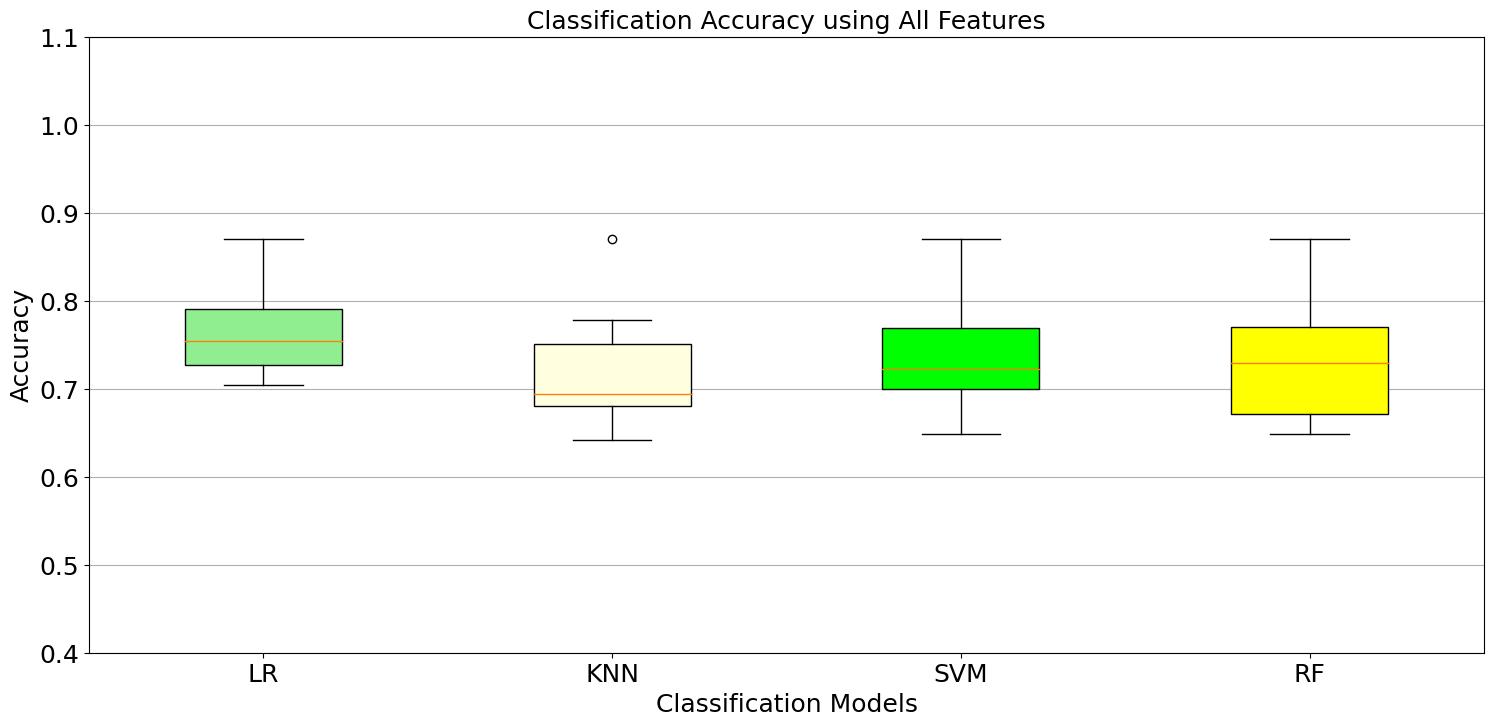

In [14]:
# BOXPLOT - visually comparing performance of the models

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))

# rectangular box plot
# place the cross-validated model_scores list from above
# into bplot_models here ------->
                           ##############
bplot_models = axes.boxplot(model_scores, vert=True, patch_artist=True)
                           ##############
    
# fill with colors - Models
colors_d = ["lightgreen", "lightyellow", "lime", "yellow"]
for patch, color in zip(bplot_models['boxes'], colors_d):
    patch.set_facecolor(color)
    
    # adding axes labels
axes.yaxis.grid(True)
axes.set_xticks([y+1 for y in range(len(model_scores))])
axes.set_xlabel('Classification Models', fontsize=18)
axes.set_ylabel('Accuracy', fontsize=18)
axes.set_ylim((.4, 1.1))
axes.set_title('Classification Accuracy using All Features', fontsize = 18)

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(model_scores))],xticklabels=['LR', 'KNN', 'SVM', 'RF'])

# increase tick size
y_ticks = axes.get_yticklabels()
x_ticks = axes.get_xticklabels()

for x in x_ticks: 
    x.set_fontsize(18)       
for y in y_ticks:
    y.set_fontsize(18)

# Confusion Matrix

Display a Confusion Matrix to evaluate the model's performance over various metrics.

              precision    recall  f1-score   support

 no diabetes       0.80      0.87      0.83       146
    diabetes       0.74      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.75       231
weighted avg       0.78      0.78      0.77       231



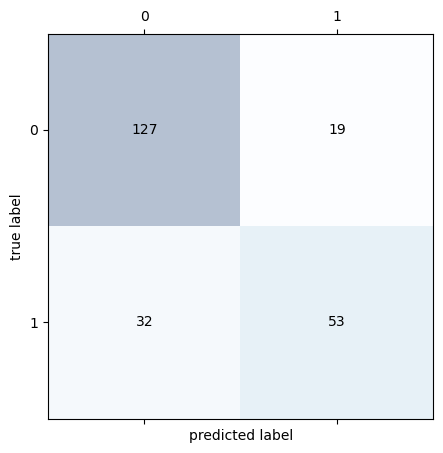

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

############# Use best performing model here

knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

################################


confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')

# Precision, Recall, and F1 scores
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred)

#print('Precision: {:.3f}, Recall: {:.3f}, F1: {:.3f}'.format(precision, recall, f1))
print(classification_report(y_test, y_pred, target_names=["no diabetes", "diabetes"]))

---